In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors 
from sklearn.svm import SVR

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df = pd.read_csv("hitters_1/hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [66]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [14]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
knn_model.n_neighbors

5

In [16]:
knn_model.metric

'minkowski'

In [17]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [18]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [19]:
y_pred = knn_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [23]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
RMSE= []

for k in range(10):
    k = k+1
    knn_model =  KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri: ", rmse)
    

k= 1 için RMSE değeri:  455.03925390751965
k= 2 için RMSE değeri:  415.99629571490965
k= 3 için RMSE değeri:  420.6765370082348
k= 4 için RMSE değeri:  428.8564674588792
k= 5 için RMSE değeri:  426.6570764525201
k= 6 için RMSE değeri:  423.5071669008732
k= 7 için RMSE değeri:  414.9361222421057
k= 8 için RMSE değeri:  413.7094731463598
k= 9 için RMSE değeri:  417.84419990871265
k= 10 için RMSE değeri:  421.6252180741266


In [25]:
#gridsearchcv

In [26]:
knn_params = {"n_neighbors":np.arange(1,30,1)}

In [27]:
knn = KNeighborsRegressor()

In [28]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [29]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [30]:
knn_tuned =  KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [31]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek vektör Regresyonu (support vector regression)

In [33]:
svr_model = SVR("linear").fit(X_train,y_train)
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [38]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [34]:
svr_model.intercept_

array([-80.15196151])

In [36]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [41]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.04084185624924

In [42]:
#model tuning

In [52]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
svr_params = {"C": [0.1, 0.5, 1, 3]}

In [56]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5, verbose =2, n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished


In [58]:
svr_cv_model.best_params_

{'C': 0.5}

In [59]:
#final model
svr_tuned = SVR("linear", C = 0.5).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

367.9874739022889

# yapay sinir ağları

In [ ]:
#model/tahmin

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [70]:
X_test_scaled = scaler.transform(X_test)

In [71]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [72]:
mlp_model 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [73]:
mlp_model.predict(X_test_scaled)[0:5]

array([15.78305057, 35.98244868, 58.1740584 , 11.74294281, 26.57471746])

In [74]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

663.9719734270143

In [76]:
#model tunning

In [78]:
mlp_params = {"alpha": [0.1,0.01, 0.02, 0.001, 0.0001],
             "hidden_layer_sizes": [(10, 20), (5, 5), (100,100)]}

In [87]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose=2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   22.8s finished


In [89]:
mlp_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [91]:
#final
mlp_tuned = MLPRegressor(alpha =0.0001, hidden_layer_sizes =(100,100)).fit(X_train_scaled, y_train)

In [92]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

368.52517653861173

# CART

In [4]:
df = pd.read_csv("hitters_1/hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [6]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [7]:
cart_model = DecisionTreeRegressor()

In [9]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

ValueError: Expected 2D array, got 1D array instead:
array=[  4.     4.01   4.02 ... 237.97 237.98 237.99].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

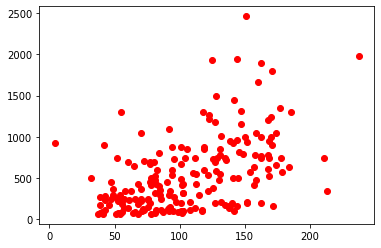

In [12]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid)))

plt.scatter(X_train, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")

plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayı(Hits)")
plt.ylabel("Maaş(Salary)");

In [ ]:
?cart_model